<a href="https://colab.research.google.com/github/japuralo/30dias/blob/master/Parte2_Modelo_de_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- *Nombre del Alumno/a*:
- *Asignatura*: Ingeniería del Conocimiento
- *Curso*: 2023/2024
- *Profesor*: Fco. Javier Martínez de Pisón
- Universidad de La Rioja

# Documentación de Apoyo

- Lección 5. Regresión Lineal, No Lineal y Logística.
- Regresión lineal con Python. Joaquin Amat Rodrigo. Octubre, 2020. https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
- Step by Step Regression & Backwards Elimination. https://www.kaggle.com/ashishsaxena2209/step-by-step-regression-backward-elimination

---

- Videos:
    - *DotCSV: Regresión Lineal y Mínimos Cuadrados Ordinarios:* https://www.youtube.com/watch?v=k964_uNn3l0
    - *DotCSV: IA NOTEBOOK #1 | Regresión Lineal y Mínimos Cuadrados Ordinarios | Programando IA:* https://www.youtube.com/watch?v=w2RJ1D6kz-o&t=175s
    - *StatQuest: Linear Regression, Clearly Explained!!!* https://www.youtube.com/watch?v=7ArmBVF2dCs
    - *StatQuest: Multiple Regression, Clearly Explained!!!* https://www.youtube.com/watch?v=EkAQAi3a4js

# Modelo de Regresión Lineal de 'Pollution'

Ahora vamos a realizar un modelo de regresión lineal y vamos a aprender a ajustar e interpretar correctamente un modelo.

La base de datos tiene las siguientes características:

- PREC: Precipitación media anual en pulgadas.
- JANT: Temperatura media de enero en grados Fahrenheit (F).
- JULT: Igual que en julio.
- OVR65: % de la población del SMSA de 1960 de 65 años o más.
- POPN: Tamaño medio de los hogares.
- EDUC: Promedio de años de estudio completados por los mayores de 22 años.
- HOUS: % de unidades de vivienda que son sólidas y con todas las instalaciones.
- DENS: Población por milla cuadrada en áreas urbanizadas, 1960.
- NONW: % de población no blanca en áreas urbanizadas, 1960.
- WWDRK: % de empleados en profesiones de cuello blanco.
- POOR: % de familias con ingresos inferiores a 3.000 dólares
- HC: Potencial relativo de contaminación por hidrocarburos.
- NOX: Igual que los óxidos nítricos.
- SO@: Igual que el dióxido de azufre.
- HUMID: Promedio anual de humedad relativa a las 13:00 horas.
- MORT: Tasa de mortalidad total ajustada por edad por cada 100.000.

Data from StatLib (ftp stat.cmu.edu/datasets)

Source: McDonald, G.C. and Schwing, R.C. (1973) 'Instabilities of regression estimates relating air pollution to mortality', Technometrics, vol.15, 463-482.


## Cargar la Base de Datos

En local, si no se dispone en windows del comando 'wget', el archivo se puede descargar directamente del enlace con el navegador: https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff. Incluir el mismo en el directorio donde está almacenado el notebook.

In [1]:
# Funciona en linux y colab
!wget https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff -O pollution_sin_comentarios.arff #Funciona en linux

--2024-03-13 18:06:32--  https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff [following]
--2024-03-13 18:06:32--  https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340 (5.2K) [text/plain]
Saving to: ‘pollution_sin_comentarios.arff’

pollution_sin_comen 100%[===================>]   5.21K  --.-KB/s    in 0s      

2024-03-13 18:06:32 (36.3 MB/s) - ‘pollution_sin_comentarios.arff’ sav

In [26]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff

In [27]:
# Usa todo el ancho del navegador
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [28]:
# Inserta imagenes en la celda a medida que se crean
%matplotlib inline

In [74]:
df_pollution = pd.DataFrame(arff.loadarff("pollution_sin_comentarios.arff")[0])
print(df_pollution.shape)
df_pollution.head()

(60, 16)


,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


In [130]:
df = df_pollution.copy()
dfc = df_pollution.copy()

In [131]:
dfn = (df - df.mean()) / df.std()

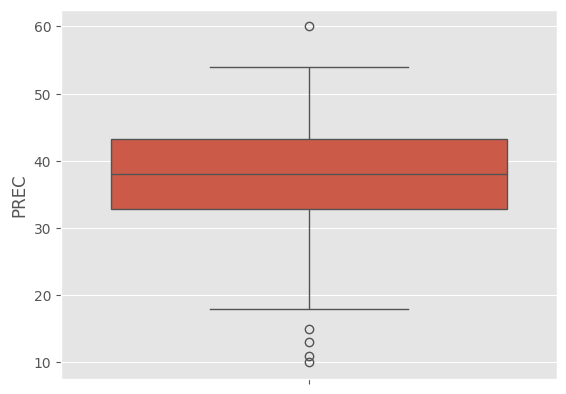

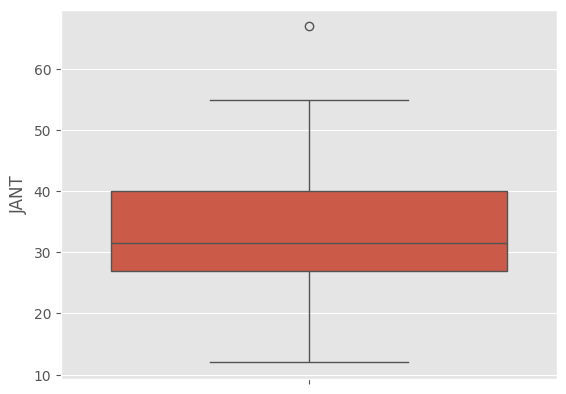

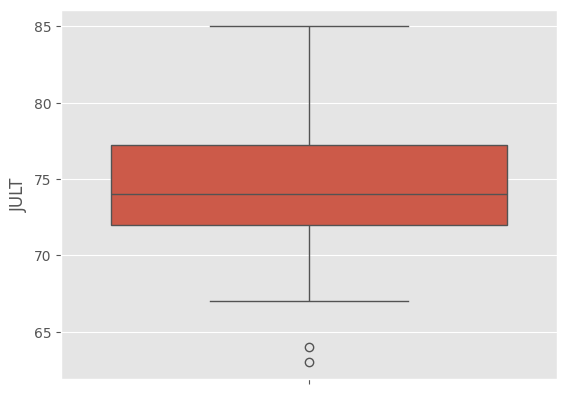

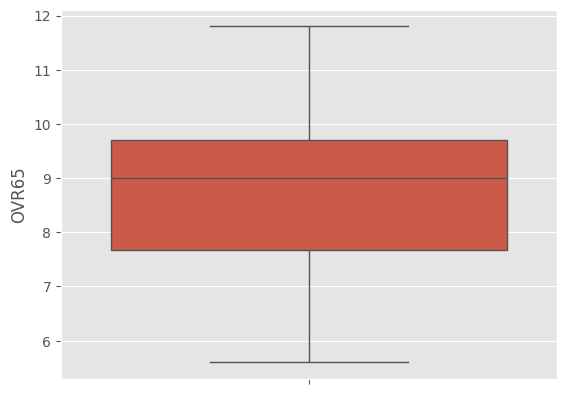

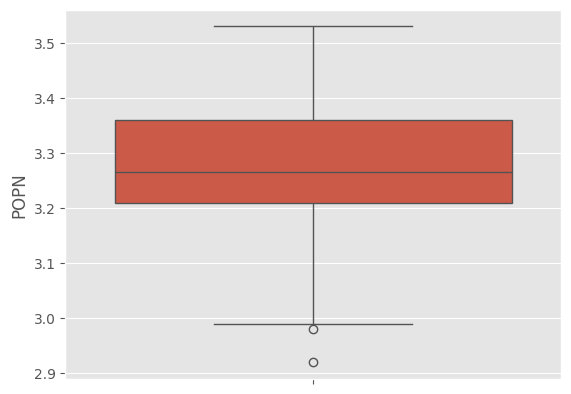

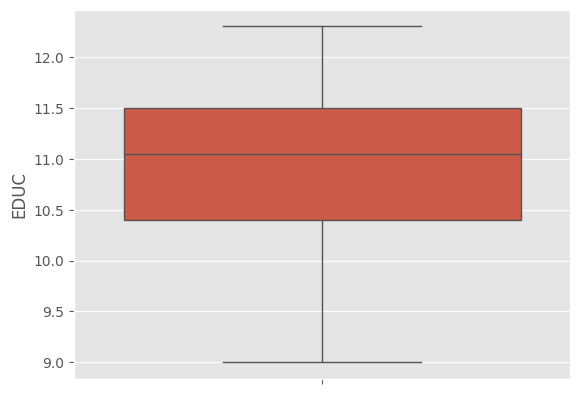

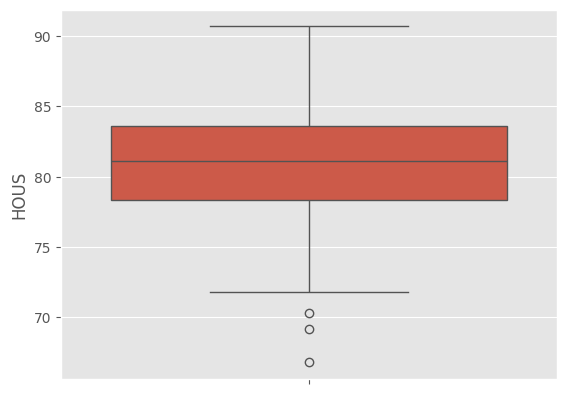

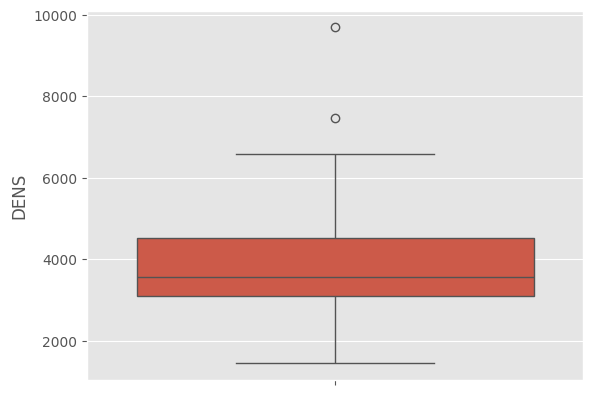

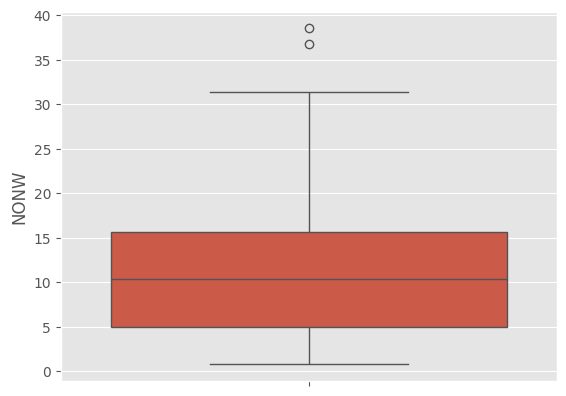

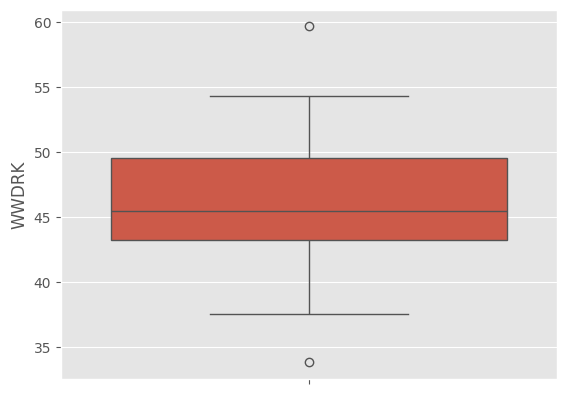

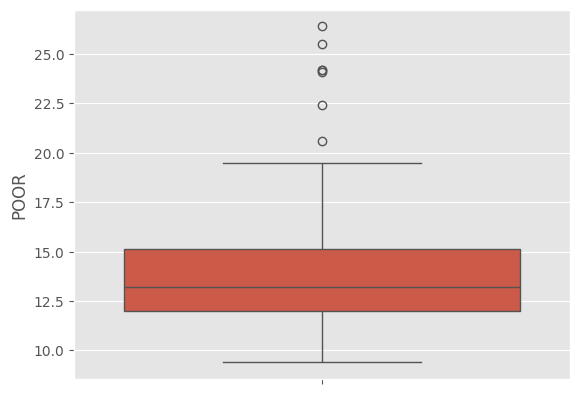

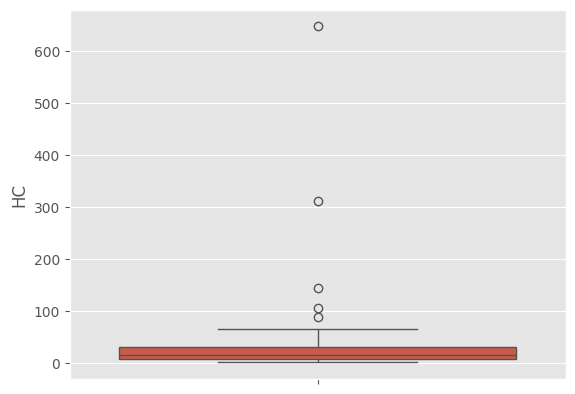

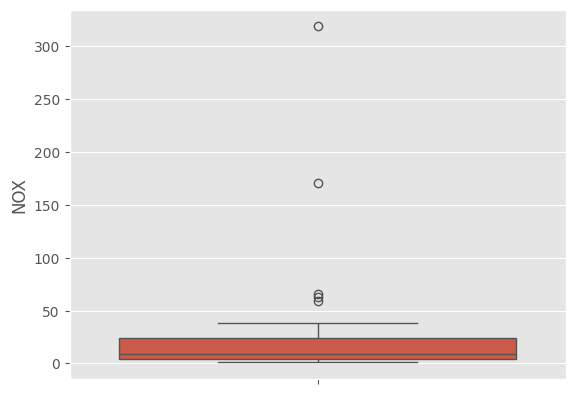

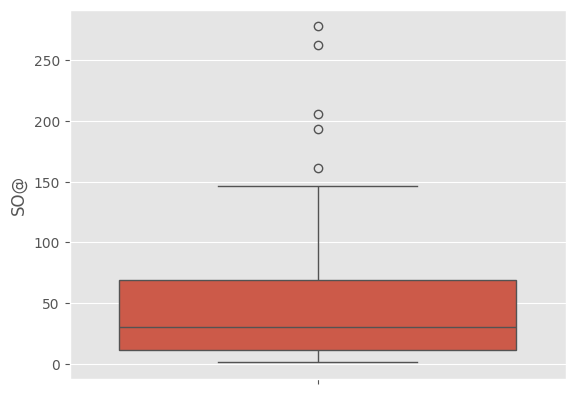

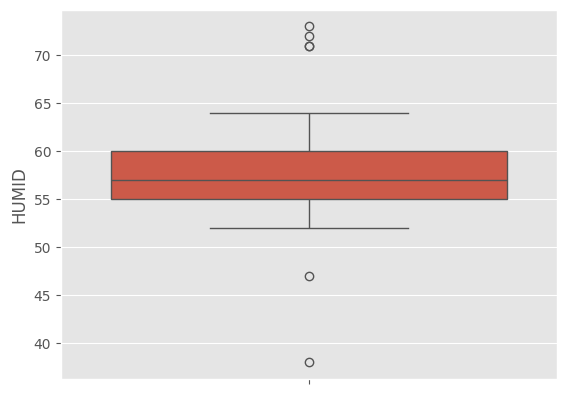

In [132]:
for ncol, colname in enumerate(df.columns[:-1]):
  _ = sns.boxplot(y=colname,data=df)
  plt.show()

In [133]:
for name in ['POOR','HC','NOX','SO@']:
  for i,v in enumerate(dfc[name]):
    if(v > dfc[name].quantile(0.95)):
      dfc[name][i] = dfc[name].median()

In [144]:
dfcn = (dfc - dfc.mean()) / dfc.std()

In [134]:
df.describe()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,37.366667,33.983333,74.583333,8.798333,3.263167,10.973333,80.913333,3876.050000,11.870000,46.081667,14.373333,37.850000,22.65000,53.766667,57.666667,940.358433
std,9.984678,10.168899,4.763177,1.464552,0.135252,0.845299,5.141373,1454.102361,8.921148,4.613043,4.160096,91.977673,46.33329,63.390468,5.369931,62.206278
min,10.000000,12.000000,63.000000,5.600000,2.920000,9.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,1.000000,1.00000,1.000000,38.000000,790.733000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,10.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,7.000000,4.00000,11.000000,55.000000,898.372000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,11.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,14.500000,9.00000,30.000000,57.000000,943.683000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,11.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,30.250000,23.75000,69.000000,60.000000,983.205750
max,60.000000,67.000000,85.000000,11.800000,3.530000,12.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,648.000000,319.00000,278.000000,73.000000,1113.156000


In [135]:
dfc.describe()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,37.366667,33.983333,74.583333,8.798333,3.263167,10.973333,80.913333,3876.050000,11.870000,46.081667,13.246667,17.816146,13.833333,37.814583,57.666667,940.358433
std,9.984678,10.168899,4.763177,1.464552,0.135252,0.845299,5.141373,1454.102361,8.921148,4.613043,2.374188,15.645736,13.557369,36.083887,5.369931,62.206278
min,10.000000,12.000000,63.000000,5.600000,2.920000,9.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,1.000000,1.000000,1.000000,38.000000,790.733000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,10.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,7.000000,4.000000,11.000000,55.000000,898.372000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,11.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,14.015625,9.000000,28.062500,57.000000,943.683000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,11.500000,83.600000,4519.750000,15.650000,49.525000,14.000000,21.000000,18.750000,48.250000,60.000000,983.205750
max,60.000000,67.000000,85.000000,11.800000,3.530000,12.300000,90.700000,9699.000000,38.500000,59.700000,20.600000,88.000000,63.000000,146.000000,73.000000,1113.156000


In [145]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df_pollution.corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
203,NOX,HC,0.983840,0.983840
188,HC,NOX,0.983840,0.983840
138,NONW,POOR,0.704915,0.704915
168,POOR,NONW,0.704915,0.704915
89,EDUC,WWDRK,0.703196,0.703196
149,WWDRK,EDUC,0.703196,0.703196
166,POOR,HOUS,-0.680680,0.680680
106,HOUS,POOR,-0.680680,0.680680
143,NONW,MORT,0.643747,0.643747
248,MORT,NONW,0.643747,0.643747


In [146]:
corr_matrix_c = dfc.corr(method='pearson')
tidy_corr_matrix(corr_matrix_c).head(10)

,variable_1,variable_2,r,abs_r
188,HC,NOX,0.853019,0.853019
203,NOX,HC,0.853019,0.853019
89,EDUC,WWDRK,0.703196,0.703196
149,WWDRK,EDUC,0.703196,0.703196
248,MORT,NONW,0.643747,0.643747
143,NONW,MORT,0.643747,0.643747
131,NONW,OVR65,-0.637821,0.637821
56,OVR65,NONW,-0.637821,0.637821
40,JULT,NONW,0.575309,0.575309
130,NONW,JULT,0.575309,0.575309


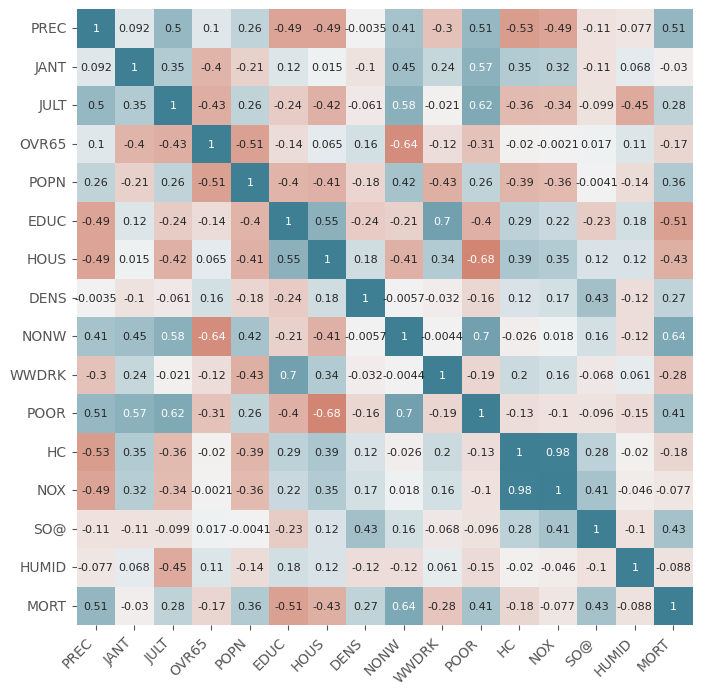

In [147]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

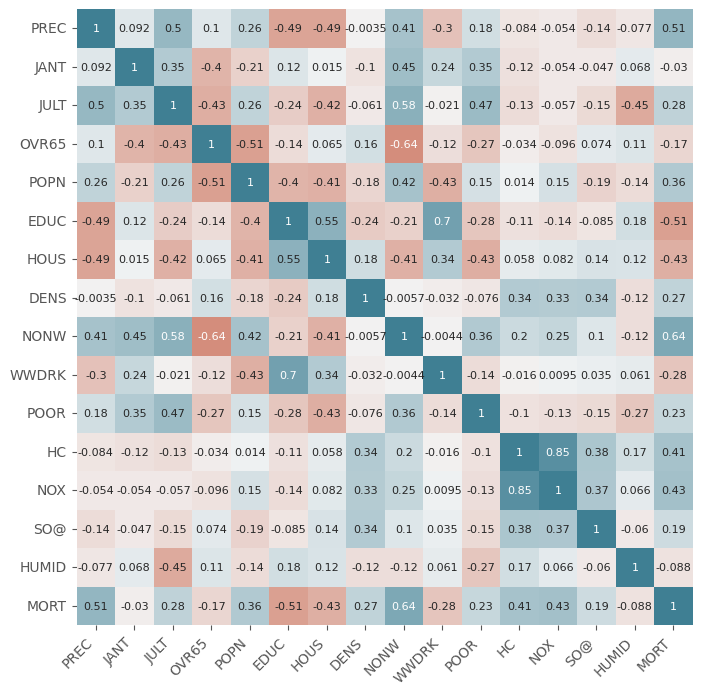

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix_c,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Base de datos de entrada 'X' y target 'y'

Extraemos la base de datos de entrenamiento y el target.

In [149]:
X = df.iloc[:,:-1] # Todas las columnas menos la última (variables independientes)
y = df['MORT'] # Salida (variable dependiente)

In [150]:
X_c = dfc.iloc[:,:-1] # Todas las columnas menos la última (variables independientes)
y_c = dfc['MORT'] # Salida (variable dependiente)

In [151]:
X_cn = dfcn.iloc[:,:-1] # Todas las columnas menos la última (variables independientes)
y_cn = dfcn['MORT'] # Salida (variable dependiente)

## Creación y análisis del modelo con todas las Variables

Usando la función OLS() del paquete *statsmodels* vamos a realizar diversos modelos lineales intentando mejorar lo máximo posible el R2 ajustado (*Adj. R-squared*).
1. Crear un modelo lineal con la base de datos de entrenamiento usando todas las variables independientes.
2. Analizar los p-valores de las variables considerando un nivel de confianza del 95% (nivel de significación del p-value<0.05). ¿Cuántas variables independientes están por debajo de ese umbral?
3. Calcular el RMSE y MAE con la matriz de testeo. Interprete el modelo y explique el significado de los errores RMSE y MAE obtenidos.
4. Analizar los coeficientes del modelo que multiplica a las variables de contaminación (HC, NOX y SO@) comparando con los valores que tienen estas variables frente a MORT en la matriz de correlación. ¿Qué ocurre aquí?
**Justifica todas las respuestas.**

Nota: *repasar en https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html los apartados relativos a la bondad del ajuste del modelo, las significancia del modelo F-test y de los predictores*.


In [152]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para
# calcular el interceptor del modelo
X = sm.add_constant(X, prepend=True)
modelo  = sm.OLS(endog=y, exog=X)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     9.542
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.19e-09
Time:                        19:22:11   Log-Likelihood:                -289.03
No. Observations:                  60   AIC:                             610.1
Df Residuals:                      44   BIC:                             643.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1763.9814    437.327      4.034      0.0

In [153]:
X_c = sm.add_constant(X_c, prepend=True)
modelo_c  = sm.OLS(endog=y_c, exog=X_c)
modelo_c  = modelo_c.fit()
print(modelo_c.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     10.19
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           7.92e-10
Time:                        19:22:12   Log-Likelihood:                -287.52
No. Observations:                  60   AIC:                             607.0
Df Residuals:                      44   BIC:                             640.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2013.6463    466.700      4.315      0.0

In [154]:
X_cn = sm.add_constant(X_cn, prepend=True)
modelo_cn  = sm.OLS(endog=y_cn, exog=X_cn)
modelo_cn  = modelo_cn.fit()
print(modelo_cn.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     10.19
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           7.92e-10
Time:                        19:22:31   Log-Likelihood:                -39.688
No. Observations:                  60   AIC:                             111.4
Df Residuals:                      44   BIC:                             144.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.665e-15      0.071  -2.36e-14      1.0

In [155]:
modelo.pvalues

const    0.000215
PREC     0.045071
JANT     0.087413
JULT     0.110159
OVR65    0.291230
POPN     0.132952
EDUC     0.155085
HOUS     0.714393
DENS     0.376147
NONW     0.001618
WWDRK    0.910883
POOR     0.958807
HC       0.177985
NOX      0.189506
SO@      0.561745
HUMID    0.927644
dtype: float64

In [156]:
modelo_c.pvalues

const    0.000089
PREC     0.007164
JANT     0.001137
JULT     0.025196
OVR65    0.210083
POPN     0.036470
EDUC     0.130535
HOUS     0.800182
DENS     0.441162
NONW     0.000039
WWDRK    0.551522
POOR     0.130608
HC       0.592208
NOX      0.044547
SO@      0.501001
HUMID    0.796950
dtype: float64

In [157]:
modelo_cn.pvalues

const    1.000000
PREC     0.007164
JANT     0.001137
JULT     0.025196
OVR65    0.210083
POPN     0.036470
EDUC     0.130535
HOUS     0.800182
DENS     0.441162
NONW     0.000039
WWDRK    0.551522
POOR     0.130608
HC       0.592208
NOX      0.044547
SO@      0.501001
HUMID    0.796950
dtype: float64

In [163]:
X2 = df[{'PREC','NONW'}] # Todas las columnas menos la última (variables independientes)
y2 = df['MORT'] # Salida (variable dependiente)

In [169]:
X2c = dfc[{'PREC','JANT','JULT','POPN','NONW','NOX'}] # Todas las columnas menos la última (variables independientes)
y2c = dfc['MORT'] # Salida (variable dependiente)

In [171]:
X2cn = dfcn[{'PREC','JANT','JULT','POPN','NONW','NOX'}] # Todas las columnas menos la última (variables independientes)
y2cn = dfcn['MORT'] # Salida (variable dependiente)

In [165]:
X2 = sm.add_constant(X2, prepend=True)
modelo2  = sm.OLS(endog=y2, exog=X2)
modelo2  = modelo2.fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     26.94
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           5.82e-09
Time:                        19:40:26   Log-Likelihood:                -312.50
No. Observations:                  60   AIC:                             631.0
Df Residuals:                      57   BIC:                             637.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        828.7606     22.915     36.167      0.0

In [170]:
X2c = sm.add_constant(X2c, prepend=True)
modelo2c  = sm.OLS(endog=y2c, exog=X2c)
modelo2c  = modelo2c.fit()
print(modelo2c.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     19.95
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.94e-12
Time:                        19:44:37   Log-Likelihood:                -297.02
No. Observations:                  60   AIC:                             608.0
Df Residuals:                      53   BIC:                             622.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1176.1189    169.523      6.938      0.0

In [172]:
X2cn = sm.add_constant(X2cn, prepend=True)
modelo2cn  = sm.OLS(endog=y2cn, exog=X2cn)
modelo2cn  = modelo2cn.fit()
print(modelo2cn.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     19.95
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.94e-12
Time:                        19:45:16   Log-Likelihood:                -49.194
No. Observations:                  60   AIC:                             112.4
Df Residuals:                      53   BIC:                             127.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.665e-15      0.075  -2.21e-14      1.0

## Modelo eliminando variables con alta correlación

Utilizando la función *tidy_corr_matrix()* analizar las variables que tienen una correlación mayor de 0.65 (en valor absoluto).
- Entre parejas de variables con alta correlación, eliminar una de ellas y obtener un nuevo modelo sin esas variables.
- Observar el R2 ajustado, el *Prob (F-statistic)* del modelo. ¿Han mejorado?
- ¿Cuántas variables independientes tienen ahora significancia estadística?

**Justifica todas las respuestas**

## Creación de un modelo con Selección Hacia Atrás (Backwards)

La función *elimina_mayor_p_valor()* devuelve un array con las variables de entrada eliminando el atributo que mayor *p-value* tiene.
- Utilizando esta función, realizar una búsqueda hacia atrás, *backwards*, eliminando variables hasta que el R2 Ajustado deje de subir.
- Para cada paso, guardar el R2 Ajustado, el *Prob (F-statistic)* del modelo.
- **Crear una tabla** mostrando la evolución de los resultados del proceso *backwards* paso a paso.

**Justifica todas las respuestas**

In [ ]:
# Función que devuelve todas las variables independientes excepto la que tiene mayor p_valor
def elimina_mayor_p_valor(x,y):
    modelo_OLS = sm.OLS(y, x).fit()
    pvalores = modelo_OLS.pvalues
    donde_mayor = np.argmax(pvalores)
    print(f"Eliminada la variable = {pvalores.index[donde_mayor]} con p-value={pvalores[donde_mayor]}")
    return np.setdiff1d(pvalores.index, pvalores.index[donde_mayor])

selec_vars = X.columns
selec_vars

Index(['const', 'PREC', 'JANT', 'JULT', 'OVR65', 'POPN', 'EDUC', 'HOUS',
       'DENS', 'NONW', 'WWDRK', 'POOR', 'HC', 'NOX', 'SO@', 'HUMID'],
      dtype='object')

In [ ]:
# Quitamos la variable con mayor p-value y recalculamos el modelo
selec_vars = elimina_mayor_p_valor(X[selec_vars], y)
print(selec_vars)
modelo  = sm.OLS(endog=y, exog=X[selec_vars])
modelo  = modelo.fit()
print(modelo.summary())

Eliminada la variable = POOR con p-value=0.9588071910859245
['DENS' 'EDUC' 'HC' 'HOUS' 'HUMID' 'JANT' 'JULT' 'NONW' 'NOX' 'OVR65'
 'POPN' 'PREC' 'SO@' 'WWDRK' 'const']
                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     10.46
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           6.58e-10
Time:                        18:30:29   Log-Likelihood:                -289.03
No. Observations:                  60   AIC:                             608.1
Df Residuals:                      45   BIC:                             639.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

## Interpretación de resultados

Con el mejor modelo conseguido:
- Analizar los resultados que muestra la función OLS().
- Interpretar los atributos finales y su importancia analizando: el *p-value* de los mismos, y sus intervalos de confianza. ¿Qué crees que explica cada una de las características?
- Dibujar los residuos usando el código de ejemplo y explicar lo que indica cada una de las gráficas.

**Justifica todas las respuestas**

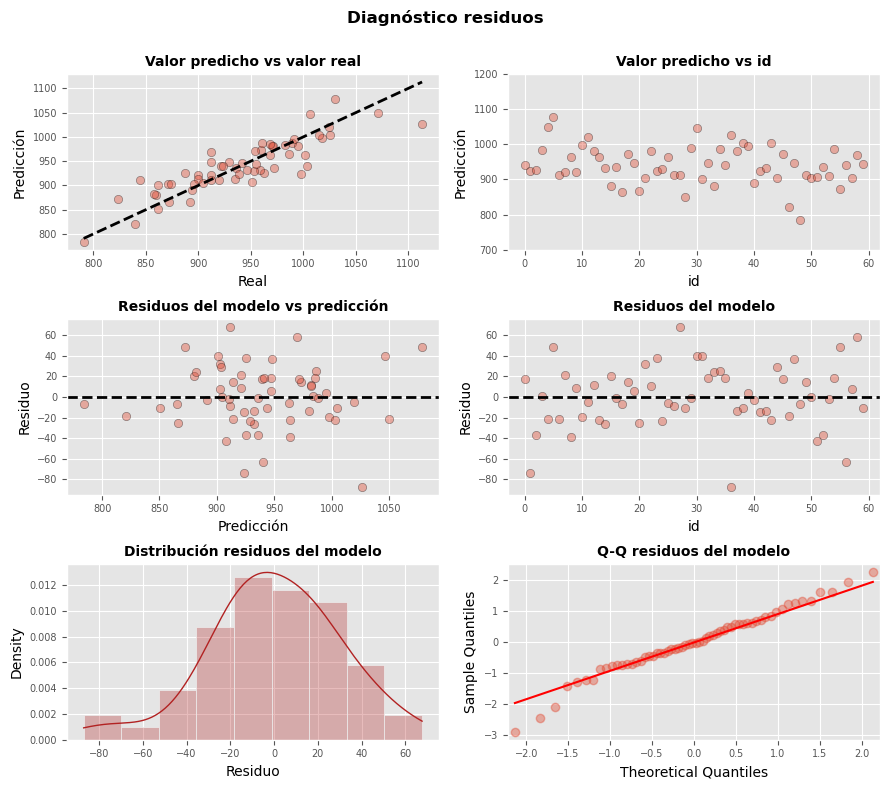

In [ ]:
prediccion_train = modelo.predict(X[selec_vars]).values
residuos_train   = prediccion_train - y.values

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

# Predicción vs real (posicion=0,0)
axes[0, 0].scatter(y, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)


# Predicción vs id  (posicion=0,1)
axes[0, 1].scatter(list(range(len(y))), prediccion_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Valor predicho vs id', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Predicción')
axes[0, 1].set_ylim(700, 1200)
axes[0, 1].tick_params(labelsize = 7)



# Residuos vs prediccion  (posicion=1,0)
axes[1, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1, 0].set_xlabel('Predicción')
axes[1, 0].set_ylabel('Residuo')
axes[1, 0].tick_params(labelsize = 7)



# Residuos del modelo vs id  (posicion=1,1)
axes[1, 1].scatter(list(range(len(y))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('id')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 7)



# Histograma  (posicion=2,0)
sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[2, 0]
)
axes[2, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[2, 0].set_xlabel("Residuo")
axes[2, 0].tick_params(labelsize = 7)


# QQ-plot  (posicion=2,1)
sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[2, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[2, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[2, 1].tick_params(labelsize = 7)



# Se eliminan los axes vacíos
# fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

# Recuerda

Si usas Colab, **recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File**.